In [2]:
import sqlite3
connection = sqlite3.connect('../vivino.db')
cursor = connection.cursor()

in `most used grapes per country` i can see top 12 country(code) used grape id :2 and wine count:801751
* these are list of country codes

In [3]:
query1 = """SELECT grapes.name, grapes.id , most_used_grapes_per_country.country_code
            FROM grapes 
            JOIN most_used_grapes_per_country ON grapes.id = most_used_grapes_per_country.grape_id       
Group BY wines_count
ORDER BY wines_count DESC
LIMIT 3"""

for x in cursor.execute(query1):
        print({'grapes':x[0], 'grape_id':x[1], 'country_code': x[2]})

{'grapes': 'Cabernet Sauvignon', 'grape_id': 2, 'country_code': 'hr'}
{'grapes': 'Chardonnay', 'grape_id': 5, 'country_code': 'ar'}
{'grapes': 'Pinot Noir', 'grape_id': 14, 'country_code': 'ch'}


In [14]:
'''q = "DROP TABLE Cabernet_Sauvignon"
cursor.execute(q)
connection.commit()'''

In [15]:
q = '''CREATE TABLE Cabernet_Sauvignon AS
       SELECT wines.name, wines.ratings_average
       FROM wines
       WHERE name LIKE '%Cabernet Sauvignon%' '''
cursor.execute(q)

In [5]:
q = '''CREATE TABLE Chardonnay AS
       SELECT wines.name, wines.ratings_average
       FROM wines
       WHERE name LIKE '%Chardonnay%' '''
cursor.execute(q)

In [6]:
q = '''CREATE TABLE Pinot_Noir AS
       SELECT wines.name, wines.ratings_average
       FROM wines
       WHERE name LIKE '%Pinot Noir%' '''
cursor.execute(q)

In [16]:
connection.commit()

In [17]:
q = '''INSERT INTO Cabernet_Sauvignon
       SELECT vintages.name, vintages.ratings_average
       FROM vintages
       WHERE name LIKE '%Cabernet Sauvignon%' '''
cursor.execute(q)

In [11]:
q = '''INSERT INTO Chardonnay
       SELECT vintages.name, vintages.ratings_average
       FROM vintages
       WHERE name LIKE '%Chardonnay%' '''
cursor.execute(q)

In [12]:
q = '''INSERT INTO Pinot_Noir
       SELECT vintages.name, vintages.ratings_average
       FROM vintages
       WHERE name LIKE '%Pinot Noir%' '''
cursor.execute(q)


In [18]:
connection.commit()

In [24]:
q = '''SELECT name 
       FROM Cabernet_Sauvignon
       ORDER BY ratings_average DESC
       LIMIT 5'''

print("top 5 wines from the grape 'Cabernet Sauvignon' :\n")
for x in cursor.execute(q):
    print(x[0])

top 5 wines from the grape 'Cabernet Sauvignon' :

Cabernet Sauvignon
Scarecrow Cabernet Sauvignon 2015
Special Selection Cabernet Sauvignon
Leonetti Cabernet Sauvignon 2006
Caymus Special Selection Cabernet Sauvignon 2017


In [25]:
q = '''SELECT name 
       FROM Chardonnay
       ORDER BY ratings_average DESC
       LIMIT 5'''

print("top 5 wines from the grape 'Chardonnay' :\n")
for x in cursor.execute(q):
    print(x[0])

top 5 wines from the grape 'Chardonnay' :

Chloe Chardonnay
Reserve Chardonnay
Bentrock Vineyard Chardonnay
Capensis Chardonnay 2016
Capensis Chardonnay 2017


In [26]:
q = '''SELECT name 
       FROM Pinot_Noir
       ORDER BY ratings_average DESC
       LIMIT 5'''

print("top 5 wines from the grape 'Pinot Noir' :\n")
for x in cursor.execute(q):
    print(x[0])

top 5 wines from the grape 'Pinot Noir' :

Finn Pinot Noir
Grace Vineyard Pinot Noir
Mark Bradford Vineyard Pinot Noir
Alpine Hillside Pinot Noir
Chacra Treinta y Dos Pinot Noir 2019


In [3]:
import pandas as pd
q1 = '''SELECT name , ratings_average
       FROM Cabernet_Sauvignon
       ORDER BY ratings_average DESC
       LIMIT 5'''
q2 = '''SELECT name , ratings_average
       FROM Chardonnay
       ORDER BY ratings_average DESC
       LIMIT 5'''
q3 = '''SELECT name , ratings_average
       FROM Pinot_Noir
       ORDER BY ratings_average DESC
       LIMIT 5'''

queries = [q1, q2, q3]
grape_names = ['Cabernet Sauvignon', 'Chardonnay', 'Pinot Noir']

dataframes = []

for i, query in enumerate(queries):
    results = cursor.execute(query).fetchall()
    df = pd.DataFrame(results, columns=['Wine Name', 'Ratings Average'])
    df['Grape'] = grape_names[i]
    dataframes.append(df)

# Combine the DataFrames into a single DataFrame
combined_df = pd.concat(dataframes, ignore_index=True)

combined_df


,Wine Name,Ratings Average,Grape
0,Cabernet Sauvignon,4.8,Cabernet Sauvignon
1,Scarecrow Cabernet Sauvignon 2015,4.8,Cabernet Sauvignon
2,Special Selection Cabernet Sauvignon,4.7,Cabernet Sauvignon
3,Leonetti Cabernet Sauvignon 2006,4.7,Cabernet Sauvignon
4,Caymus Special Selection Cabernet Sauvignon 2017,4.7,Cabernet Sauvignon
5,Chloe Chardonnay,4.5,Chardonnay
6,Reserve Chardonnay,4.5,Chardonnay
7,Bentrock Vineyard Chardonnay,4.5,Chardonnay
8,Capensis Chardonnay 2016,4.5,Chardonnay
9,Capensis Chardonnay 2017,4.5,Chardonnay


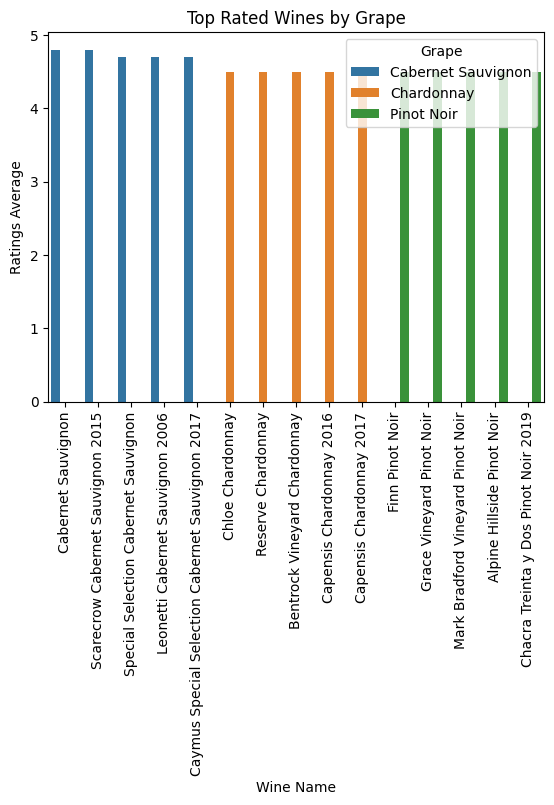

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(data=combined_df, x='Wine Name', y='Ratings Average', hue='Grape')
plt.xlabel('Wine Name')
plt.ylabel('Ratings Average')
plt.title('Top Rated Wines by Grape')
#plt.ylim(4, 5)
plt.xticks(rotation=90)
plt.show()

In [5]:
# closing database
cursor.close()
connection.close()